# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test. (datacamp code)
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
# Importing pandas, numpy  and matplotlib. 

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
 # Exploring  the data: Checking the rows and columns of the data. 
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Q1. Is the distribution of body temperatures normal? 

There are three ways to determine if the body temperature is normal: 

a) Histograms: By comparing a histogram of the sample data to a normal probability curve

b) Normality Tests: Back-of-the-envelope test

c) Q-Q plot: Plotting Sample Vs Theoretical Quantiles 

Hypothesis: 
    
    Null Hypothesis,            Ho: Normal Distribution 
        
    Alternative Hypothesis,     Ha: Not a normal distribution 
    
    Significance                α = 0.05

## (I) Visualization of the Distribution of Human Body Temperatures

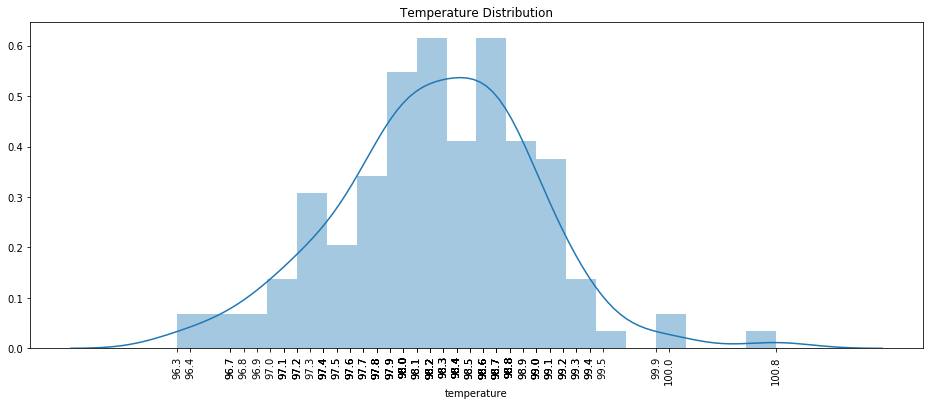

p-value = 0.258747986349


In [25]:
#a) Histograms: By comparing a histogram of the sample data to a normal probability and running a normal test.   

import seaborn as sns
plt.figure(figsize = (16,6))
sns.distplot(df['temperature'], bins = 20)
plt.xticks(df['temperature'], rotation = 'vertical')
plt.title('Temperature Distribution')
plt.show()

# Norm Test from scipy 
from scipy.stats import *
statistic, pvalue = stats.normaltest(df['temperature'])
print('p-value = ' + str(pvalue))

**Visually the distribution appears to be normally distributed.**

In [26]:
# Normal Test Results 

if pvalue < 0.05:
    print('Not a Normal Distribution (Reject Ho)')
else :
    print('Normal Distribution (Fail to reject Ho)')

Normal Distribution (Fail to reject Ho)


The normaltest from scipy showed that the pvalue of 0.26 which is lesser than the assumed statistical significance value 0.05. So, we fail to reject null hypothesis suggesting that temperatues are normally distributed.

In [9]:
# b) Q-Q plot: Importing seed, randn and qqplot. 
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

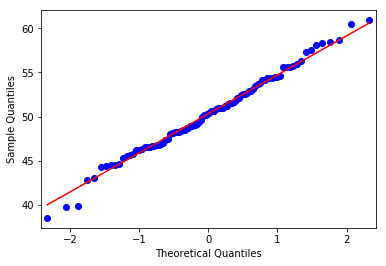

In [10]:
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

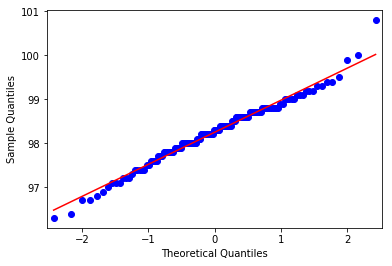

In [11]:
# Plotting Sample Temperature with Q-Qplot to see the distribution of the temperatures. 
qqplot(df['temperature'], line='s')
pyplot.show()

From the qq plot, the overlap of samples points with the straight line shows strong correlation between the samples data points and theoretical quantiles suggesting that the data are normally distributed. 

**The a) Data visualiztion with histogram, b) the normal test and c) the correlation in the QQ plots strongly supports that the body temperature has a normal distribution.** 

### Qs 2a. Is the sample size large? 


In [12]:
print ('The Sample Size ='+ str(len(df)))   

The Sample Size =130


According to Central Limit Theorem (CTL) when the random sampling size is large (n ≥ 30), the distribution tends to be normally distributed. Here we have a sample size of 130 which is sufficently large sample size. 

### Qs 2b. Are the observations independent?  

Yes, the observations are made independently and each observation is a body temp of an indiviual. This is a biological observation and each sample is measured separately so there is no interdependence between samples.  

### Q3a. Is the true population mean really 98.6 degrees F?


We can answer the above question by proposing Null and Alternative Hypothesis. 

Null Hypothesis,          **Ho: Mean(mu)**    = 98.6 degrees F

Alternative Hypothesis,   **Ha: Mean(mu)**   != 98.6 degrees F

Significance,              α = 0.05

 ### Qs 3b. Bootstrap Hypothesis Test

In [29]:
# Define the bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    return func(np.random.choice(data, size=len(data)))

# Drawing Bootstrap replicates using the for loop
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [74]:
 # Generating bootstrap replicates of mean temperatures
    bs_replicates = draw_bs_reps(df['temperature'], np.mean, size= 10000)

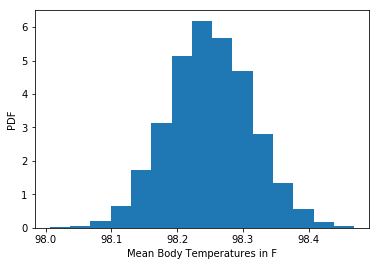

In [75]:
# Plotting histogram of bootstrap replicate, mean body temprature 
_ = plt.hist(bs_replicates, bins = 15, normed = True)
_ = plt.xlabel("Mean Body Temperatures in F")
_ = plt.ylabel('PDF')

plt.show()

In [76]:
# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))

# Compute and print standard deviation of bootstrap replicates
std = np.std(bs_replicates)

print('SEM : ' + str(sem) + '    STD : ' + str(std) )

SEM : 0.0640566146952    STD : 0.063958205168


In [77]:
# Compute confidence interval of bootstrap replicates
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int)

95% confidence interval = [ 98.12615385  98.37538462]


**Note**: The mean body temperature 98.6 F does not lie between the confidence interval. 

In [84]:
# Make an array of translated mean such that its mean is 98.6 
translated_temp = df['temperature'] -np.mean(df['temperature']) + 98.6


def diff_from_popmean(data, popmean = 98.6):
    return np.mean(data) - popmean



# Take bootstrap replicates of mean
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
diff_obs = diff_from_popmean(temps)


# Compute fraction of replicates that are less than the observed mean. 
p = np.sum(bs_replicates >= np.mean(df['temperature']) / 10000)

# Print the p-value
print('p = ', p)

p =  10000


In [86]:
def diff_from_popmean(data, popmean = 98.6):
    return np.mean(data) - popmean
mu = np.mean(df['temperature'])
temps_shifted = df['temperature'] - mu + 98.6
diff_obs = diff_from_popmean(df['temperature'])
bs_replicates = draw_bs_reps(temps_shifted, diff_from_popmean, 10000)
p = np.sum(bs_replicates <= diff_obs) / 10000
print('p-value=',p)

p-value= 0.0


**Conclusion**: The p value is low, so we have to dismiss the null hypothesis and conclude from the data set that the human body temperature is not 98.6 F.   

### Qs 3c. t and z - Single Sample Test. 

Since n> 30 we can use Z test to get more insights into the population distribution. With larger samples we use Z test and smaller samples we use t test. In this case we only have one observation so we will use one sample z and t test. Incase variance is not known, t-test can also be done, or the standard deviation can be calculated using the sample standard deviation (Khan Academy Course: Significance tests (hypothesis testing))

In [13]:
# Hypothesis test using Z test 
from statsmodels.stats.weightstats import ztest
z_score, p_value_z = ztest(df['temperature'], value = 98.6)
print('z_score : ' + str(z_score) + '    p_value : ' + str(p_value_z) )

z_score : -5.45482329236    p_value : 4.9021570141e-08


In [58]:
# Hypothesis test using t test
t_score, p_value_t = stats.ttest_1samp(df['temperature'], 98.6)   
print('t_score : ' + str(t_score) + '    p_value : ' + str(p_value_t) )

t_score : -5.45482329236    p_value : 2.41063204156e-07


**Conclusion:** Since the p-value mean is low, we can dismiss the null hypothesis. The body temperatures from thsi datasignificantly different from 98.6

### Qs 4. Taking small sample of size 10 from the data and repeat the frequentist tests.

In this case we will use t-test as the sample size is small and population variance is not known. 

In [16]:
import random
Temp_10 = random.sample(list(df['temperature']), 10)

In [17]:
Temp_10

[98.200000000000003,
 98.099999999999994,
 97.099999999999994,
 98.599999999999994,
 96.700000000000003,
 97.299999999999997,
 98.5,
 98.0,
 98.799999999999997,
 98.799999999999997]

In [18]:
# Running Z_test on the sample_10 using ztest from statsmodels.stats.weightstat. 
from statsmodels.stats.weightstats import ztest
z_score_10, p_value_z_10 = ztest(Temp_10, value = 98.6)
print('z_score_10 : ' + str(z_score_10) + '    p_value_10 : ' + str(p_value_z_10) )

z_score_10 : -2.52112197149    p_value_10 : 0.0116981295143


In [59]:
# Running t_test on sample_10. 
t_score_10, p_value_t_10 = stats.ttest_1samp(Temp_10, 98.6)     
print('t_score : ' + str(t_score) + '    p_value : ' + str(p_value_t) )

t_score : -5.45482329236    p_value : 2.41063204156e-07


**Note:** The t_score is same as the z_score value where as the p value has changed.

**Conclusion**: As we increase our sample size, our t-test will converge to yield a similar result as a z-test. We also find that our p-value in this test is even smaller than our t-test and suggests an even smaller probability that we would observe a population mean greater than 98.6

### Qs 5. At what temperature should we consider someone's temperature to be "abnormal"?

###  Qs 5a. Bootstrap Hypothesis Test

In [89]:
# Generating bootstrap replicates of mean temperatures
bs_replicates = draw_bs_reps(df['temperature'], np.mean, size= 10000)
# Compute confidence interval of bootstrap replicates
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int)

95% confidence interval = [ 98.12538462  98.37463462]


Any temperature above or below these values can be considered abnormal. 

### Qs 5b. t and z - Single Sample Test.

We can set up a significance level of 95% to be certain that the temperature is abnormal. For 95% Z score = 1.96. 

Margin of error = Z * (std of sample)/sqrt(n) where 'n' is the sample size.

In [20]:
Margin_of_error = 1.96 * 0.733183/np.sqrt(len(df['temperature']))
print('Margin of Error: ' + str(Margin_of_error))

Margin of Error: 0.126036629835


In [61]:
# mean and std value were plugged in to calculate the confidence interval of temperature. 
conf_int = norm.interval(0.95, loc= 98.25, scale=0.73/np.sqrt(df['temperature'].count()))
print('Confidence Interval : ' + str(conf_int))

print('At the 95% level, the lower bound of our confidence interval is ',conf_int[0], 
      ' and the upper bound is ',conf_int[1])


Confidence Interval : (98.124512844495854, 98.375487155504146)
At the 95% level, the lower bound of our confidence interval is  98.1245128445  and the upper bound is  98.3754871555


We can see that the confidence interval lies between 98.123 and 98.374. So, any temperatures outside this range are to be considered "abnormal"

### Qs 6. Is there a significant difference between males and females in normal temperature?

### t and z - Two-tailed Two Sample Test.

I will conduct a two-tailed, two-sample t-test on the temperatures of the male and female populations.

Ho: mu (males) = mu(females)

HA:  mu (males) != mu(females)   

If the p-value is lower than 0.05 we would reject the Null, that the two means are equal.

In [ ]:
Plotting ECDFs for Men and Women body temperatures. 


**Method** By creating an array of male and female temperatures. 

In [78]:
# Creating arrays for male temperatures and female temperatures and calculating 
temp_male = np.array(df.temperature[df.gender=='M'])
temp_female = np.array(df.temperature[df.gender=='F'])

#Calculating the T-test for the means of TWO INDEPENDENT samples of scores.
t_score, p_value_t= stats.ttest_ind(temp_male,temp_female)
print('t_score : ' + str(t_score) + '    p_value : ' + str(p_value_t) )

t_score : -2.28543453817    p_value : 0.0239318831224


In [79]:
# Conclusions

if p_value_t < 0.05:
    print('Conclusion: Body Temperature between men and women is different (Reject Ho)')
else :
    print('Conclusion: Body Temperature between men and women is not different (Fail to reject Ho)')

Conclusion: Body Temperature between men and women is different (Reject Ho)


**Thoughts:** From the hypothesis testing on the sample population we will reject Ho which states that there is no difference between the body temperatures of men and women. To further validate we may want to increase the power of analysis by either increasing the sample size or decrease the significance levels to avoid the Type I error.  

Other methods that can be used for comparing these two temperatures is "A two-sample bootstrap hypothesis test for difference of means." 